In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import keras.initializers 
from keras import regularizers

In [22]:
# If GPU is not available: 
# GPU_USE = '/cpu:0'
# config = tf.ConfigProto(device_count = {"GPU": 0})


# If GPU is available: 
config = tf.ConfigProto()
config.log_device_placement = True
config.allow_soft_placement = True
config.gpu_options.allocator_type = 'BFC'

# Limit the maximum memory used
config.gpu_options.per_process_gpu_memory_fraction = 0.1

# set session config
tf.keras.backend.set_session(tf.Session(config=config))

In [26]:
FilePath = "/home/nramvinojen/Programs/Workbench/24Jan2019/"
NewFVlen = 100
Class = 8
#RunFolder = "Default"
RunFolder = "28Jan2019"

Class = 8

In [27]:
# load dataset
dataframe = pandas.read_csv(FilePath + "Runs/"+ RunFolder + "/FV100_fromResnet/Fixation_WeightedSum_Combined_Csv/TR_CombinedFixation_FeatureVector.csv", header=None)
X = dataframe.values.astype(float)
# load dataset
dataframe = pd.read_csv(FilePath +"Runs/" + RunFolder + "/FV2048_Resnet/TR_Label.csv", header=None)
Y_temp = dataframe.values
Y = Y_temp[:,0]

In [28]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [29]:
y_train_one_hot = tf.keras.utils.to_categorical(Y, Class)

In [30]:
# load dataset
dataframe = pandas.read_csv(FilePath + "Runs/"+ RunFolder + "/FV100_fromResnet/Fixation_WeightedSum_Combined_Csv/Test_CombinedFixation_FeatureVector.csv", header=None)
X_test = dataframe.values.astype(float)


dataframe = pd.read_csv(FilePath +"Runs/" + RunFolder + "/FV2048_Resnet/Test_Label.csv", header=None)
Ytest_temp = dataframe.values
Y_test = Ytest_temp[:,0]

In [31]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y_test)
encoded_Ytest = encoder.transform(Y)


In [33]:
y_test_one_hot = tf.keras.utils.to_categorical(Y_test, Class)


In [104]:
#####VIJETH
########## HYPER PARAMETERS
batch_size = 512
epochs = 1200
optimizer = tf.keras.optimizers.Adadelta()
keras.initializers.glorot_normal(seed=None)
########## HYPER PARAMETERS

########## MODEL ARCHITECTURE
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(28, activation='relu',kernel_initializer='orthogonal', input_shape=(100,)))
model.add(tf.keras.layers.Dropout(0.5))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dense(8, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dense(16, activation='relu'))#WAS removed 
model.add(tf.keras.layers.Dense(Class, activation='softmax'))
########## MODEL ARCHITECTURE

# Print summary
model.summary()

# compile model for training
model.compile(loss='kullback_leibler_divergence',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(X, y_train_one_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test_one_hot))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 28)                2828      
_________________________________________________________________
dropout_36 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 8)                 232       
Total params: 3,060
Trainable params: 3,060
Non-trainable params: 0
_________________________________________________________________
Train on 240 samples, validate on 72 samples
Epoch 1/1200
240/240 [==============================]240/240 [==============================] - 3s 13ms/step - loss: 4.7282 - acc: 0.1417 - val_loss: 3.4332 - val_acc: 0.0694

Epoch 2/1200
240/240 [==============================]240/240 [==============================] - 0s 85us/step - loss: 4.6126 - acc: 0.1167 - val_loss: 3.3848 - val_acc: 0.0694

Epoch 3


Epoch 43/1200
240/240 [==============================]240/240 [==============================] - 0s 33us/step - loss: 2.4485 - acc: 0.1333 - val_loss: 2.2130 - val_acc: 0.0833

Epoch 44/1200
240/240 [==============================]240/240 [==============================] - 0s 33us/step - loss: 2.4667 - acc: 0.1417 - val_loss: 2.2020 - val_acc: 0.0972

Epoch 45/1200
240/240 [==============================]240/240 [==============================] - 0s 31us/step - loss: 2.3501 - acc: 0.1750 - val_loss: 2.1872 - val_acc: 0.0972

Epoch 46/1200
240/240 [==============================]240/240 [==============================] - 0s 35us/step - loss: 2.3179 - acc: 0.1667 - val_loss: 2.1810 - val_acc: 0.1111

Epoch 47/1200
240/240 [==============================]240/240 [==============================] - 0s 33us/step - loss: 2.3754 - acc: 0.1708 - val_loss: 2.1657 - val_acc: 0.1389

Epoch 48/1200
240/240 [==============================]240/240 [==============================] - 0s 31us/step - lo


Epoch 90/1200
240/240 [==============================]240/240 [==============================] - 0s 115us/step - loss: 1.8976 - acc: 0.2375 - val_loss: 1.9567 - val_acc: 0.3472

Epoch 91/1200
240/240 [==============================]240/240 [==============================] - 0s 112us/step - loss: 1.9866 - acc: 0.2458 - val_loss: 1.9567 - val_acc: 0.3194

Epoch 92/1200
240/240 [==============================]240/240 [==============================] - 0s 101us/step - loss: 1.9317 - acc: 0.3083 - val_loss: 1.9507 - val_acc: 0.3472

Epoch 93/1200
240/240 [==============================]240/240 [==============================] - 0s 106us/step - loss: 1.9475 - acc: 0.2750 - val_loss: 1.9477 - val_acc: 0.3472

Epoch 94/1200
240/240 [==============================]240/240 [==============================] - 0s 105us/step - loss: 1.8546 - acc: 0.2500 - val_loss: 1.9463 - val_acc: 0.3472

Epoch 95/1200
240/240 [==============================]240/240 [==============================] - 0s 112us/ste


Epoch 136/1200
240/240 [==============================]240/240 [==============================] - 0s 80us/step - loss: 1.7520 - acc: 0.3208 - val_loss: 1.8656 - val_acc: 0.3750

Epoch 137/1200
240/240 [==============================]240/240 [==============================] - 0s 79us/step - loss: 1.7452 - acc: 0.3750 - val_loss: 1.8620 - val_acc: 0.3889

Epoch 138/1200
240/240 [==============================]240/240 [==============================] - 0s 89us/step - loss: 1.7854 - acc: 0.3542 - val_loss: 1.8622 - val_acc: 0.3889

Epoch 139/1200
240/240 [==============================]240/240 [==============================] - 0s 78us/step - loss: 1.7036 - acc: 0.3667 - val_loss: 1.8594 - val_acc: 0.3889

Epoch 140/1200
240/240 [==============================]240/240 [==============================] - 0s 75us/step - loss: 1.7057 - acc: 0.3583 - val_loss: 1.8574 - val_acc: 0.3750

Epoch 141/1200
240/240 [==============================]240/240 [==============================] - 0s 86us/ste


Epoch 182/1200
240/240 [==============================]240/240 [==============================] - 0s 30us/step - loss: 1.7229 - acc: 0.3833 - val_loss: 1.8005 - val_acc: 0.4167

Epoch 183/1200
240/240 [==============================]240/240 [==============================] - 0s 36us/step - loss: 1.6912 - acc: 0.3792 - val_loss: 1.8013 - val_acc: 0.4167

Epoch 184/1200
240/240 [==============================]240/240 [==============================] - 0s 36us/step - loss: 1.6725 - acc: 0.4292 - val_loss: 1.8009 - val_acc: 0.4306

Epoch 185/1200
240/240 [==============================]240/240 [==============================] - 0s 68us/step - loss: 1.7361 - acc: 0.3667 - val_loss: 1.8002 - val_acc: 0.4167

Epoch 186/1200
240/240 [==============================]240/240 [==============================] - 0s 115us/step - loss: 1.6909 - acc: 0.4042 - val_loss: 1.7982 - val_acc: 0.4167

Epoch 187/1200
240/240 [==============================]240/240 [==============================] - 0s 111us/s


Epoch 228/1200
240/240 [==============================]240/240 [==============================] - 0s 101us/step - loss: 1.6390 - acc: 0.4333 - val_loss: 1.7635 - val_acc: 0.4306

Epoch 229/1200
240/240 [==============================]240/240 [==============================] - 0s 83us/step - loss: 1.6663 - acc: 0.3833 - val_loss: 1.7623 - val_acc: 0.4444

Epoch 230/1200
240/240 [==============================]240/240 [==============================] - 0s 96us/step - loss: 1.6288 - acc: 0.4125 - val_loss: 1.7637 - val_acc: 0.4444

Epoch 231/1200
240/240 [==============================]240/240 [==============================] - 0s 89us/step - loss: 1.6104 - acc: 0.4250 - val_loss: 1.7634 - val_acc: 0.4444

Epoch 232/1200
240/240 [==============================]240/240 [==============================] - 0s 81us/step - loss: 1.6315 - acc: 0.4125 - val_loss: 1.7648 - val_acc: 0.4306

Epoch 233/1200
240/240 [==============================]240/240 [==============================] - 0s 84us/st


Epoch 274/1200
240/240 [==============================]240/240 [==============================] - 0s 69us/step - loss: 1.5869 - acc: 0.4083 - val_loss: 1.7403 - val_acc: 0.4306

Epoch 275/1200
240/240 [==============================]240/240 [==============================] - 0s 75us/step - loss: 1.6260 - acc: 0.4292 - val_loss: 1.7408 - val_acc: 0.4306

Epoch 276/1200
240/240 [==============================]240/240 [==============================] - 0s 81us/step - loss: 1.6077 - acc: 0.4417 - val_loss: 1.7421 - val_acc: 0.4444

Epoch 277/1200
240/240 [==============================]240/240 [==============================] - 0s 76us/step - loss: 1.5768 - acc: 0.4167 - val_loss: 1.7413 - val_acc: 0.4306

Epoch 278/1200
240/240 [==============================]240/240 [==============================] - 0s 35us/step - loss: 1.6030 - acc: 0.4167 - val_loss: 1.7439 - val_acc: 0.4444

Epoch 279/1200
240/240 [==============================]240/240 [==============================] - 0s 44us/ste


Epoch 320/1200
240/240 [==============================]240/240 [==============================] - 0s 95us/step - loss: 1.5588 - acc: 0.4333 - val_loss: 1.7316 - val_acc: 0.4306

Epoch 321/1200
240/240 [==============================]240/240 [==============================] - 0s 107us/step - loss: 1.5798 - acc: 0.4500 - val_loss: 1.7273 - val_acc: 0.4167

Epoch 322/1200
240/240 [==============================]240/240 [==============================] - 0s 91us/step - loss: 1.5993 - acc: 0.4333 - val_loss: 1.7258 - val_acc: 0.4306

Epoch 323/1200
240/240 [==============================]240/240 [==============================] - 0s 97us/step - loss: 1.5721 - acc: 0.4125 - val_loss: 1.7255 - val_acc: 0.4028

Epoch 324/1200
240/240 [==============================]240/240 [==============================] - 0s 92us/step - loss: 1.5321 - acc: 0.4750 - val_loss: 1.7280 - val_acc: 0.4167

Epoch 325/1200
240/240 [==============================]240/240 [==============================] - 0s 81us/st


Epoch 366/1200
240/240 [==============================]240/240 [==============================] - 0s 72us/step - loss: 1.5318 - acc: 0.4375 - val_loss: 1.7159 - val_acc: 0.4028

Epoch 367/1200
240/240 [==============================]240/240 [==============================] - 0s 77us/step - loss: 1.5184 - acc: 0.4750 - val_loss: 1.7139 - val_acc: 0.4167

Epoch 368/1200
240/240 [==============================]240/240 [==============================] - 0s 81us/step - loss: 1.5362 - acc: 0.4500 - val_loss: 1.7129 - val_acc: 0.4444

Epoch 369/1200
240/240 [==============================]240/240 [==============================] - 0s 98us/step - loss: 1.5606 - acc: 0.4125 - val_loss: 1.7147 - val_acc: 0.4444

Epoch 370/1200
240/240 [==============================]240/240 [==============================] - 0s 86us/step - loss: 1.4932 - acc: 0.4667 - val_loss: 1.7115 - val_acc: 0.4306

Epoch 371/1200
240/240 [==============================]240/240 [==============================] - 0s 111us/st


Epoch 412/1200
240/240 [==============================]240/240 [==============================] - 0s 69us/step - loss: 1.5281 - acc: 0.4792 - val_loss: 1.7039 - val_acc: 0.4167

Epoch 413/1200
240/240 [==============================]240/240 [==============================] - 0s 77us/step - loss: 1.6141 - acc: 0.4042 - val_loss: 1.7026 - val_acc: 0.4167

Epoch 414/1200
240/240 [==============================]240/240 [==============================] - 0s 33us/step - loss: 1.4943 - acc: 0.4500 - val_loss: 1.7048 - val_acc: 0.4306

Epoch 415/1200
240/240 [==============================]240/240 [==============================] - 0s 31us/step - loss: 1.4717 - acc: 0.4875 - val_loss: 1.7033 - val_acc: 0.4444

Epoch 416/1200
240/240 [==============================]240/240 [==============================] - 0s 30us/step - loss: 1.5022 - acc: 0.4417 - val_loss: 1.7042 - val_acc: 0.4444

Epoch 417/1200
240/240 [==============================]240/240 [==============================] - 0s 32us/ste


Epoch 458/1200
240/240 [==============================]240/240 [==============================] - 0s 111us/step - loss: 1.4583 - acc: 0.4792 - val_loss: 1.6974 - val_acc: 0.4444

Epoch 459/1200
240/240 [==============================]240/240 [==============================] - 0s 118us/step - loss: 1.4203 - acc: 0.5208 - val_loss: 1.6961 - val_acc: 0.4444

Epoch 460/1200
240/240 [==============================]240/240 [==============================] - 0s 86us/step - loss: 1.4505 - acc: 0.4375 - val_loss: 1.6949 - val_acc: 0.4583

Epoch 461/1200
240/240 [==============================]240/240 [==============================] - 0s 113us/step - loss: 1.4319 - acc: 0.5042 - val_loss: 1.6962 - val_acc: 0.4306

Epoch 462/1200
240/240 [==============================]240/240 [==============================] - 0s 97us/step - loss: 1.4498 - acc: 0.4625 - val_loss: 1.6971 - val_acc: 0.4444

Epoch 463/1200
240/240 [==============================]240/240 [==============================] - 0s 107us


Epoch 504/1200
240/240 [==============================]240/240 [==============================] - 0s 84us/step - loss: 1.4475 - acc: 0.4542 - val_loss: 1.6932 - val_acc: 0.4306

Epoch 505/1200
240/240 [==============================]240/240 [==============================] - 0s 83us/step - loss: 1.4780 - acc: 0.4500 - val_loss: 1.6922 - val_acc: 0.4028

Epoch 506/1200
240/240 [==============================]240/240 [==============================] - 0s 90us/step - loss: 1.4704 - acc: 0.4542 - val_loss: 1.6937 - val_acc: 0.4444

Epoch 507/1200
240/240 [==============================]240/240 [==============================] - 0s 98us/step - loss: 1.5039 - acc: 0.4708 - val_loss: 1.6957 - val_acc: 0.4583

Epoch 508/1200
240/240 [==============================]240/240 [==============================] - 0s 77us/step - loss: 1.4510 - acc: 0.4625 - val_loss: 1.6943 - val_acc: 0.4583

Epoch 509/1200
240/240 [==============================]240/240 [==============================] - 0s 88us/ste


Epoch 550/1200
240/240 [==============================]240/240 [==============================] - 0s 31us/step - loss: 1.4485 - acc: 0.4333 - val_loss: 1.6991 - val_acc: 0.4306

Epoch 551/1200
240/240 [==============================]240/240 [==============================] - 0s 31us/step - loss: 1.4368 - acc: 0.4500 - val_loss: 1.6951 - val_acc: 0.4306

Epoch 552/1200
240/240 [==============================]240/240 [==============================] - 0s 106us/step - loss: 1.4227 - acc: 0.4875 - val_loss: 1.6970 - val_acc: 0.4167

Epoch 553/1200
240/240 [==============================]240/240 [==============================] - 0s 117us/step - loss: 1.4600 - acc: 0.4542 - val_loss: 1.6982 - val_acc: 0.4306

Epoch 554/1200
240/240 [==============================]240/240 [==============================] - 0s 95us/step - loss: 1.4945 - acc: 0.4833 - val_loss: 1.6992 - val_acc: 0.4306

Epoch 555/1200
240/240 [==============================]240/240 [==============================] - 0s 118us/


Epoch 596/1200
240/240 [==============================]240/240 [==============================] - 0s 71us/step - loss: 1.3435 - acc: 0.5125 - val_loss: 1.6949 - val_acc: 0.4028

Epoch 597/1200
240/240 [==============================]240/240 [==============================] - 0s 81us/step - loss: 1.4390 - acc: 0.4750 - val_loss: 1.6939 - val_acc: 0.4028

Epoch 598/1200
240/240 [==============================]240/240 [==============================] - 0s 124us/step - loss: 1.4027 - acc: 0.5125 - val_loss: 1.6962 - val_acc: 0.3889

Epoch 599/1200
240/240 [==============================]240/240 [==============================] - 0s 89us/step - loss: 1.3900 - acc: 0.4875 - val_loss: 1.6959 - val_acc: 0.4028

Epoch 600/1200
240/240 [==============================]240/240 [==============================] - 0s 86us/step - loss: 1.4071 - acc: 0.4917 - val_loss: 1.6932 - val_acc: 0.4028

Epoch 601/1200
240/240 [==============================]240/240 [==============================] - 0s 120us/s


Epoch 642/1200
240/240 [==============================]240/240 [==============================] - 0s 79us/step - loss: 1.3295 - acc: 0.5417 - val_loss: 1.6968 - val_acc: 0.4444

Epoch 643/1200
240/240 [==============================]240/240 [==============================] - 0s 72us/step - loss: 1.3803 - acc: 0.4833 - val_loss: 1.7002 - val_acc: 0.3750

Epoch 644/1200
240/240 [==============================]240/240 [==============================] - 0s 70us/step - loss: 1.3730 - acc: 0.4750 - val_loss: 1.7082 - val_acc: 0.3889

Epoch 645/1200
240/240 [==============================]240/240 [==============================] - 0s 87us/step - loss: 1.3684 - acc: 0.4958 - val_loss: 1.6958 - val_acc: 0.4306

Epoch 646/1200
240/240 [==============================]240/240 [==============================] - 0s 81us/step - loss: 1.3717 - acc: 0.4583 - val_loss: 1.6996 - val_acc: 0.4028

Epoch 647/1200
240/240 [==============================]240/240 [==============================] - 0s 77us/ste


Epoch 688/1200
240/240 [==============================]240/240 [==============================] - 0s 68us/step - loss: 1.3598 - acc: 0.4583 - val_loss: 1.6903 - val_acc: 0.4306

Epoch 689/1200
240/240 [==============================]240/240 [==============================] - 0s 121us/step - loss: 1.3309 - acc: 0.5208 - val_loss: 1.6922 - val_acc: 0.4306

Epoch 690/1200
240/240 [==============================]240/240 [==============================] - 0s 96us/step - loss: 1.3125 - acc: 0.4958 - val_loss: 1.6988 - val_acc: 0.4167

Epoch 691/1200
240/240 [==============================]240/240 [==============================] - 0s 114us/step - loss: 1.3308 - acc: 0.5042 - val_loss: 1.7002 - val_acc: 0.4167

Epoch 692/1200
240/240 [==============================]240/240 [==============================] - 0s 113us/step - loss: 1.3848 - acc: 0.4583 - val_loss: 1.6936 - val_acc: 0.4306

Epoch 693/1200
240/240 [==============================]240/240 [==============================] - 0s 98us/


Epoch 734/1200
240/240 [==============================]240/240 [==============================] - 0s 100us/step - loss: 1.3095 - acc: 0.5625 - val_loss: 1.6923 - val_acc: 0.4583

Epoch 735/1200
240/240 [==============================]240/240 [==============================] - 0s 100us/step - loss: 1.3096 - acc: 0.5333 - val_loss: 1.6938 - val_acc: 0.4167

Epoch 736/1200
240/240 [==============================]240/240 [==============================] - 0s 77us/step - loss: 1.3686 - acc: 0.4667 - val_loss: 1.6907 - val_acc: 0.4306

Epoch 737/1200
240/240 [==============================]240/240 [==============================] - 0s 81us/step - loss: 1.3058 - acc: 0.5167 - val_loss: 1.7034 - val_acc: 0.4167

Epoch 738/1200
240/240 [==============================]240/240 [==============================] - 0s 88us/step - loss: 1.3536 - acc: 0.4792 - val_loss: 1.7043 - val_acc: 0.4167

Epoch 739/1200
240/240 [==============================]240/240 [==============================] - 0s 83us/s


Epoch 780/1200
240/240 [==============================]240/240 [==============================] - 0s 115us/step - loss: 1.3285 - acc: 0.4917 - val_loss: 1.6909 - val_acc: 0.4444

Epoch 781/1200
240/240 [==============================]240/240 [==============================] - 0s 45us/step - loss: 1.3147 - acc: 0.5292 - val_loss: 1.6944 - val_acc: 0.4444

Epoch 782/1200
240/240 [==============================]240/240 [==============================] - 0s 32us/step - loss: 1.3014 - acc: 0.4917 - val_loss: 1.6883 - val_acc: 0.4444

Epoch 783/1200
240/240 [==============================]240/240 [==============================] - 0s 35us/step - loss: 1.3217 - acc: 0.4833 - val_loss: 1.6916 - val_acc: 0.4444

Epoch 784/1200
240/240 [==============================]240/240 [==============================] - 0s 32us/step - loss: 1.3838 - acc: 0.4875 - val_loss: 1.6873 - val_acc: 0.4444

Epoch 785/1200
240/240 [==============================]240/240 [==============================] - 0s 37us/st


Epoch 826/1200
240/240 [==============================]240/240 [==============================] - 0s 124us/step - loss: 1.2512 - acc: 0.5417 - val_loss: 1.6931 - val_acc: 0.4444

Epoch 827/1200
240/240 [==============================]240/240 [==============================] - 0s 100us/step - loss: 1.2963 - acc: 0.5042 - val_loss: 1.6875 - val_acc: 0.4583

Epoch 828/1200
240/240 [==============================]240/240 [==============================] - 0s 102us/step - loss: 1.3243 - acc: 0.5417 - val_loss: 1.6876 - val_acc: 0.4444

Epoch 829/1200
240/240 [==============================]240/240 [==============================] - 0s 97us/step - loss: 1.3154 - acc: 0.5083 - val_loss: 1.6929 - val_acc: 0.4444

Epoch 830/1200
240/240 [==============================]240/240 [==============================] - 0s 81us/step - loss: 1.3224 - acc: 0.5083 - val_loss: 1.6871 - val_acc: 0.4444

Epoch 831/1200
240/240 [==============================]240/240 [==============================] - 0s 79us/


Epoch 872/1200
240/240 [==============================]240/240 [==============================] - 0s 80us/step - loss: 1.2908 - acc: 0.5250 - val_loss: 1.6898 - val_acc: 0.4722

Epoch 873/1200
240/240 [==============================]240/240 [==============================] - 0s 79us/step - loss: 1.2309 - acc: 0.5375 - val_loss: 1.6917 - val_acc: 0.4722

Epoch 874/1200
240/240 [==============================]240/240 [==============================] - 0s 82us/step - loss: 1.2774 - acc: 0.5167 - val_loss: 1.6887 - val_acc: 0.4722

Epoch 875/1200
240/240 [==============================]240/240 [==============================] - 0s 87us/step - loss: 1.3010 - acc: 0.4917 - val_loss: 1.6939 - val_acc: 0.4583

Epoch 876/1200
240/240 [==============================]240/240 [==============================] - 0s 79us/step - loss: 1.2775 - acc: 0.5333 - val_loss: 1.6915 - val_acc: 0.4722

Epoch 877/1200
240/240 [==============================]240/240 [==============================] - 0s 78us/ste


Epoch 918/1200
240/240 [==============================]240/240 [==============================] - 0s 34us/step - loss: 1.1962 - acc: 0.5250 - val_loss: 1.6969 - val_acc: 0.5000

Epoch 919/1200
240/240 [==============================]240/240 [==============================] - 0s 35us/step - loss: 1.3196 - acc: 0.5000 - val_loss: 1.7026 - val_acc: 0.5000

Epoch 920/1200
240/240 [==============================]240/240 [==============================] - 0s 124us/step - loss: 1.2572 - acc: 0.5042 - val_loss: 1.7012 - val_acc: 0.5139

Epoch 921/1200
240/240 [==============================]240/240 [==============================] - 0s 86us/step - loss: 1.2747 - acc: 0.4958 - val_loss: 1.7012 - val_acc: 0.4722

Epoch 922/1200
240/240 [==============================]240/240 [==============================] - 0s 99us/step - loss: 1.2593 - acc: 0.5167 - val_loss: 1.7112 - val_acc: 0.5139

Epoch 923/1200
240/240 [==============================]240/240 [==============================] - 0s 111us/s


Epoch 964/1200
240/240 [==============================]240/240 [==============================] - 0s 93us/step - loss: 1.2435 - acc: 0.5625 - val_loss: 1.7056 - val_acc: 0.4722

Epoch 965/1200
240/240 [==============================]240/240 [==============================] - 0s 104us/step - loss: 1.3131 - acc: 0.5083 - val_loss: 1.7001 - val_acc: 0.4722

Epoch 966/1200
240/240 [==============================]240/240 [==============================] - 0s 79us/step - loss: 1.2224 - acc: 0.5333 - val_loss: 1.6961 - val_acc: 0.4722

Epoch 967/1200
240/240 [==============================]240/240 [==============================] - 0s 83us/step - loss: 1.2183 - acc: 0.5542 - val_loss: 1.7012 - val_acc: 0.4722

Epoch 968/1200
240/240 [==============================]240/240 [==============================] - 0s 79us/step - loss: 1.2358 - acc: 0.5208 - val_loss: 1.7025 - val_acc: 0.4583

Epoch 969/1200
240/240 [==============================]240/240 [==============================] - 0s 84us/st


Epoch 1010/1200
240/240 [==============================]240/240 [==============================] - 0s 66us/step - loss: 1.3014 - acc: 0.4833 - val_loss: 1.7082 - val_acc: 0.4583

Epoch 1011/1200
240/240 [==============================]240/240 [==============================] - 0s 78us/step - loss: 1.2300 - acc: 0.5208 - val_loss: 1.7083 - val_acc: 0.4583

Epoch 1012/1200
240/240 [==============================]240/240 [==============================] - 0s 75us/step - loss: 1.2387 - acc: 0.5042 - val_loss: 1.7073 - val_acc: 0.4583

Epoch 1013/1200
240/240 [==============================]240/240 [==============================] - 0s 70us/step - loss: 1.2773 - acc: 0.5292 - val_loss: 1.7084 - val_acc: 0.4583

Epoch 1014/1200
240/240 [==============================]240/240 [==============================] - 0s 41us/step - loss: 1.2007 - acc: 0.5292 - val_loss: 1.7116 - val_acc: 0.4583

Epoch 1015/1200
240/240 [==============================]240/240 [==============================] - 0s 30


Epoch 1056/1200
240/240 [==============================]240/240 [==============================] - 0s 95us/step - loss: 1.1926 - acc: 0.5458 - val_loss: 1.7190 - val_acc: 0.4583

Epoch 1057/1200
240/240 [==============================]240/240 [==============================] - 0s 88us/step - loss: 1.1878 - acc: 0.5417 - val_loss: 1.7183 - val_acc: 0.4583

Epoch 1058/1200
240/240 [==============================]240/240 [==============================] - 0s 114us/step - loss: 1.1838 - acc: 0.5500 - val_loss: 1.7230 - val_acc: 0.4583

Epoch 1059/1200
240/240 [==============================]240/240 [==============================] - 0s 114us/step - loss: 1.2313 - acc: 0.5375 - val_loss: 1.7165 - val_acc: 0.4722

Epoch 1060/1200
240/240 [==============================]240/240 [==============================] - 0s 123us/step - loss: 1.2189 - acc: 0.5750 - val_loss: 1.7220 - val_acc: 0.4722

Epoch 1061/1200
240/240 [==============================]240/240 [==============================] - 0s


Epoch 1102/1200
240/240 [==============================]240/240 [==============================] - 0s 86us/step - loss: 1.2072 - acc: 0.5667 - val_loss: 1.7291 - val_acc: 0.4444

Epoch 1103/1200
240/240 [==============================]240/240 [==============================] - 0s 108us/step - loss: 1.2174 - acc: 0.5417 - val_loss: 1.7354 - val_acc: 0.4583

Epoch 1104/1200
240/240 [==============================]240/240 [==============================] - 0s 113us/step - loss: 1.1860 - acc: 0.5667 - val_loss: 1.7242 - val_acc: 0.4444

Epoch 1105/1200
240/240 [==============================]240/240 [==============================] - 0s 90us/step - loss: 1.1866 - acc: 0.5500 - val_loss: 1.7232 - val_acc: 0.4444

Epoch 1106/1200
240/240 [==============================]240/240 [==============================] - 0s 73us/step - loss: 1.2404 - acc: 0.5208 - val_loss: 1.7260 - val_acc: 0.4444

Epoch 1107/1200
240/240 [==============================]240/240 [==============================] - 0s 


Epoch 1148/1200
240/240 [==============================]240/240 [==============================] - 0s 33us/step - loss: 1.2103 - acc: 0.5208 - val_loss: 1.7394 - val_acc: 0.4444

Epoch 1149/1200
240/240 [==============================]240/240 [==============================] - 0s 34us/step - loss: 1.1928 - acc: 0.5500 - val_loss: 1.7416 - val_acc: 0.4444

Epoch 1150/1200
240/240 [==============================]240/240 [==============================] - 0s 31us/step - loss: 1.1468 - acc: 0.5375 - val_loss: 1.7346 - val_acc: 0.4444

Epoch 1151/1200
240/240 [==============================]240/240 [==============================] - 0s 41us/step - loss: 1.1991 - acc: 0.5208 - val_loss: 1.7376 - val_acc: 0.4444

Epoch 1152/1200
240/240 [==============================]240/240 [==============================] - 0s 115us/step - loss: 1.2257 - acc: 0.5667 - val_loss: 1.7463 - val_acc: 0.4306

Epoch 1153/1200
240/240 [==============================]240/240 [==============================] - 0s 9


Epoch 1194/1200
240/240 [==============================]240/240 [==============================] - 0s 99us/step - loss: 1.2261 - acc: 0.5042 - val_loss: 1.7579 - val_acc: 0.4444

Epoch 1195/1200
240/240 [==============================]240/240 [==============================] - 0s 85us/step - loss: 1.2135 - acc: 0.5458 - val_loss: 1.7548 - val_acc: 0.4444

Epoch 1196/1200
240/240 [==============================]240/240 [==============================] - 0s 85us/step - loss: 1.1624 - acc: 0.5500 - val_loss: 1.7575 - val_acc: 0.4444

Epoch 1197/1200
240/240 [==============================]240/240 [==============================] - 0s 73us/step - loss: 1.1936 - acc: 0.5292 - val_loss: 1.7497 - val_acc: 0.4444

Epoch 1198/1200
240/240 [==============================]240/240 [==============================] - 0s 74us/step - loss: 1.2844 - acc: 0.5000 - val_loss: 1.7498 - val_acc: 0.4306

Epoch 1199/1200
240/240 [==============================]240/240 [==============================] - 0s 12

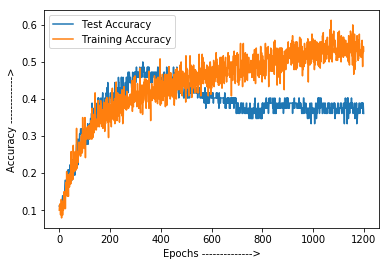

In [93]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_acc'], label="Test Accuracy")
plt.plot(history.history['acc'], label="Training Accuracy")
plt.ylabel('Accuracy ------------->')
plt.xlabel('Epochs -------------->')
plt.legend()

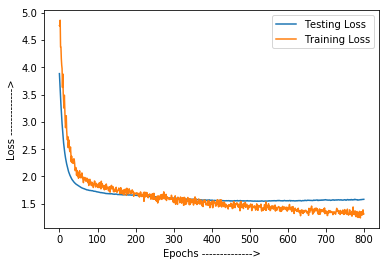

In [69]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], label="Testing Loss")
plt.plot(history.history['loss'], label="Training Loss")
plt.ylabel('Loss ------------->')
plt.xlabel('Epochs -------------->')
plt.legend()

In [88]:
import datetime
now = datetime.datetime.now()
TempName = str(now.day) +str(now.month)+ str(now.hour) + str(now.minute)

# serialize model to JSON
model_json = model.to_json()
with open(FilePath + "Runs/" + RunFolder + "/ModelsAndWeights/"+ TempName +"Predict_DNN_100FVfromResnet_8Class.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(FilePath + "Runs/" + RunFolder + "/ModelsAndWeights/"+ TempName +"Predict_DNN_100FVfromResnet_8Class.h5")
print("Saved model to disk")

Saved model to disk
